In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [3]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

rawdata = unpickle('./dataset/data_batch_1')
dataset = rawdata[b'data']
labels  = rawdata[b'labels']
outvecs = []

for l in labels:
    z = np.zeros(10)
    z[l] = 1.0
    outvecs.append(z)

In [4]:
# some squashers and derivatives.
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))
def dsigmoid(x):
    return x * (1 - x)

In [20]:
weights = np.random.randn(10, 3072)
learning_rate = 0.0307
gdata = []

for t in range(50):
    if t % 10 == 0:
        print("iteration #", t)
    
    loss = 0
    for d, o in zip(dataset, outvecs):
        
        #forward propagate.
        y = sigmoid(np.dot(weights, d / 255.0))

        #compute error and fix it.
        diff = (o - y)
        loss += 0.5 * np.sum(diff * diff)
        e = learning_rate * diff * dsigmoid(y)
        f = np.dot(np.transpose([e]), [d])

        weights -= f
    gdata.append(loss / len(dataset))
print("training done")

iteration # 0
iteration # 10
iteration # 20
iteration # 30
iteration # 40
training done


In [21]:
# test the model.
cnt = 0
for d, l in zip(dataset, labels):
    o = np.argmax(sigmoid(np.dot(weights, d)))
    if o == l:
        cnt = cnt + 1

print(cnt, "/", len(labels))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


1005 / 10000


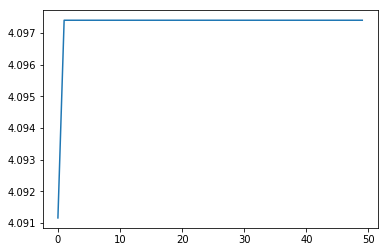

In [22]:
plt.plot(gdata)
plt.show()

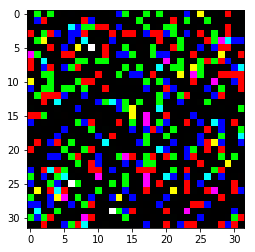

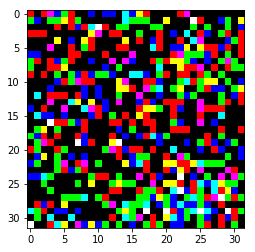

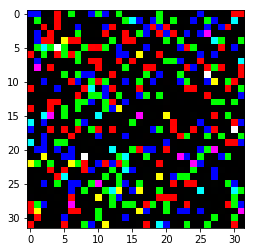

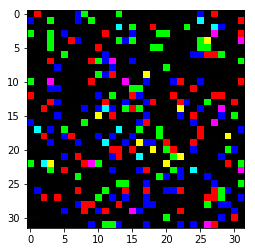

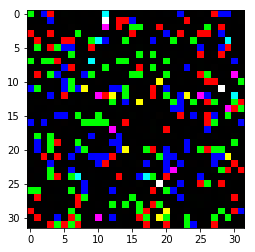

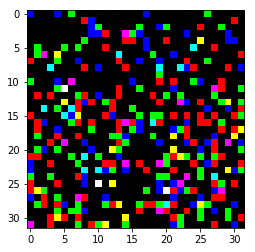

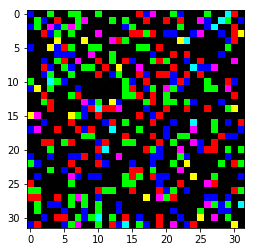

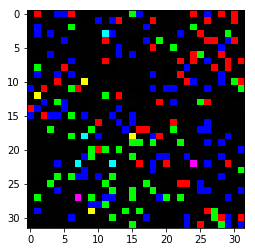

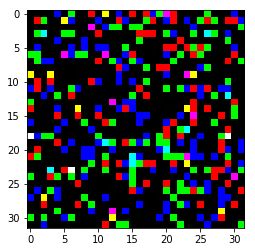

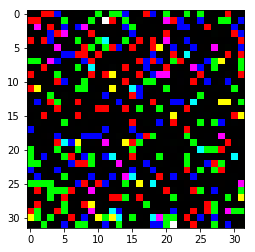

In [23]:
#Plot the weights as images.
for x in weights:
    #construct the image.
    img = np.empty([32, 32, 3], np.uint8)
    
    for i in range(1024):
        iy = int(np.floor(i / 32))
        ix = int(np.floor(i % 32))
        img[iy][ix][0] = int(x[i])
        img[iy][ix][1] = int(x[i+1024])
        img[iy][ix][2] = int(x[i+2048])
    plt.imshow(img)
    plt.show()